In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv, det
from tqdm.notebook import tqdm
import random
from scipy.stats import multivariate_normal

#**K-means Clustering**

(50, 2)
(50, 2)


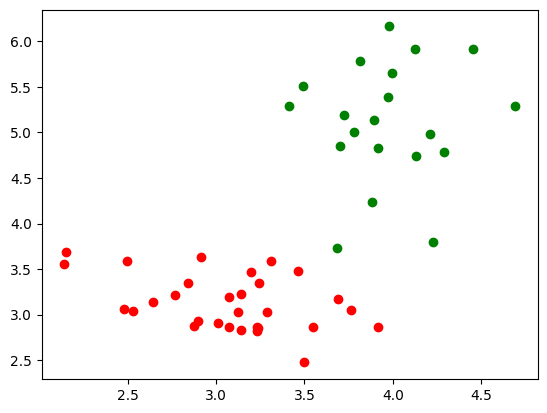

In [ ]:
mean1 = np.array([3, 3])
mean2 = np.array([4, 5])
cov1 = np.array([[0.2, 0], [0, 0.1]])
cov2 = np.array([[0.1, 0], [0, 0.3]])
size1 = 30
size2 = 20
train_size = size1 + size2

# N * 2
x_train = np.random.multivariate_normal(mean1, cov1, size1)
x_train = np.concatenate((x_train, np.random.multivariate_normal(mean2, cov2, size2)), axis=0)
print(x_train.shape)

# N * 3
y_train = np.array([[1, 0]] * size1)
y_train = np.concatenate((y_train, np.array([[0, 1]] * size2)), axis=0)
print(y_train.shape)


for i in range(0, train_size):
  if y_train[i][0] == 1:
    color = 'r'
  elif y_train[i][1] == 1:
    color = 'g'

  plt.scatter(x_train[i][0], x_train[i][1], c=color)

[[1.95251231 3.80905286]
 [4.38482916 1.5098827 ]]
[[1.95251231 3.80905286]
 [4.38482916 1.5098827 ]]
[[3.4965128  2.73962185]
 [3.3883888  3.85929712]]


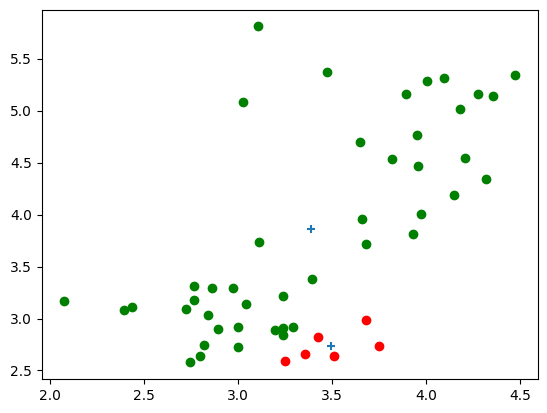

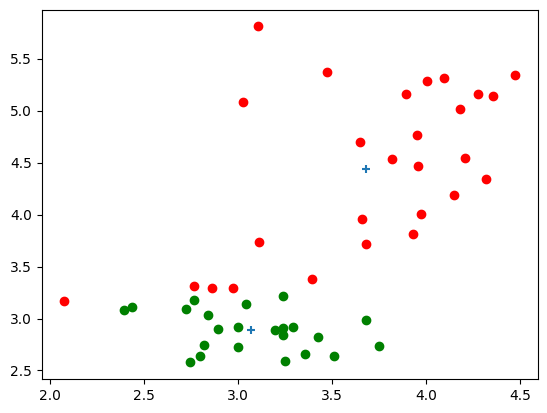

In [ ]:
centers = np.array([ [np.random.uniform(0, 5), np.random.uniform(0, 5)], [np.random.uniform(0, 5), np.random.uniform(0, 5)] ])
print(centers)
r = np.ones_like(y_train)

iters = 2

for iter in range(0, iters):
  print(centers)
  # update r
  for n in range(0, train_size):
    distances = ((centers - x_train[n]) ** 2).sum(axis=1)
    closest = np.argmax(distances)
    r[n] = [0, 0]
    r[n][closest] = 1

  # update mu
  denominators = r.sum(axis=0)
  numerators = np.array([[0.0, 0.0]] * 2)
  for n in range(0, train_size):
    assigned_class = np.argmax(r[n])
    numerators[assigned_class] += x_train[n] / denominators[assigned_class]

  centers = numerators


  # plot
  plt.figure(iter)
  for i in range(0, train_size):
    if r[i][0] == 1:
      color = 'r'
    elif r[i][1] == 1:
      color = 'g'

    plt.scatter(x_train[i][0], x_train[i][1], c=color)

  plt.scatter(centers[:, 0], centers[:, 1], marker="+")

In [ ]:
print(centers)

[[1.08358374 0.99049322]
 [3.17880116 4.7192678 ]
 [0.         0.        ]]


#**EM**

<ipython-input-3-503e46c56bf7>:16: RuntimeWarning: covariance is not positive-semidefinite.
  x_train = np.random.multivariate_normal(mean1, cov1, size1)
<ipython-input-3-503e46c56bf7>:17: RuntimeWarning: covariance is not positive-semidefinite.
  x_train = np.concatenate((x_train, np.random.multivariate_normal(mean2, cov2, size2)), axis=0)
<ipython-input-3-503e46c56bf7>:18: RuntimeWarning: covariance is not positive-semidefinite.
  x_train = np.concatenate((x_train, np.random.multivariate_normal(mean3, cov3, size3)), axis=0)


(300, 2)
(300, 3)


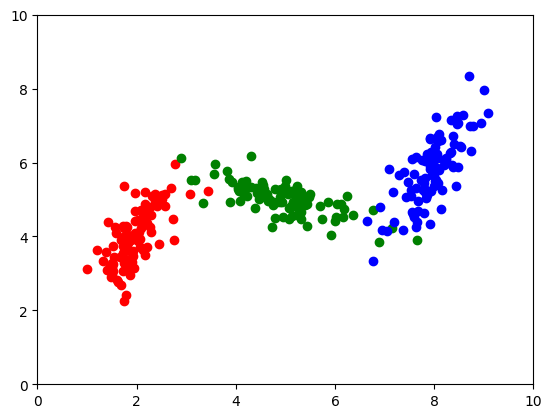

In [ ]:
mean1 = np.array([2, 4])
mean2 = np.array([5, 5])
mean3 = np.array([8, 6])
cov1 = np.array([[0.06, 0.3],
                 [0.3, 0.6]])
cov2 = np.array([[0.6, -0.3],
                 [-0.3, 0.06]])
cov3 = np.array([[0.06, 0.3],
                 [0.3, 0.6]])
size1 = 100
size2 = 100
size3 = 100
train_size = size1 + size2 + size3

# N * 2
x_train = np.random.multivariate_normal(mean1, cov1, size1)
x_train = np.concatenate((x_train, np.random.multivariate_normal(mean2, cov2, size2)), axis=0)
x_train = np.concatenate((x_train, np.random.multivariate_normal(mean3, cov3, size3)), axis=0)
print(x_train.shape)

# N * 3
y_train = np.array([[1, 0, 0]] * size1)
y_train = np.concatenate((y_train, np.array([[0, 1, 0]] * size2)), axis=0)
y_train = np.concatenate((y_train, np.array([[0, 0, 1]] * size3)), axis=0)
print(y_train.shape)

plt.xlim(0, 10)
plt.ylim(0, 10)
for i in range(0, train_size):
  if y_train[i][0] == 1:
    color = 'r'
  elif y_train[i][1] == 1:
    color = 'g'
  elif y_train[i][2] == 1:
    color = 'b'

  plt.scatter(x_train[i][0], x_train[i][1], c=color)


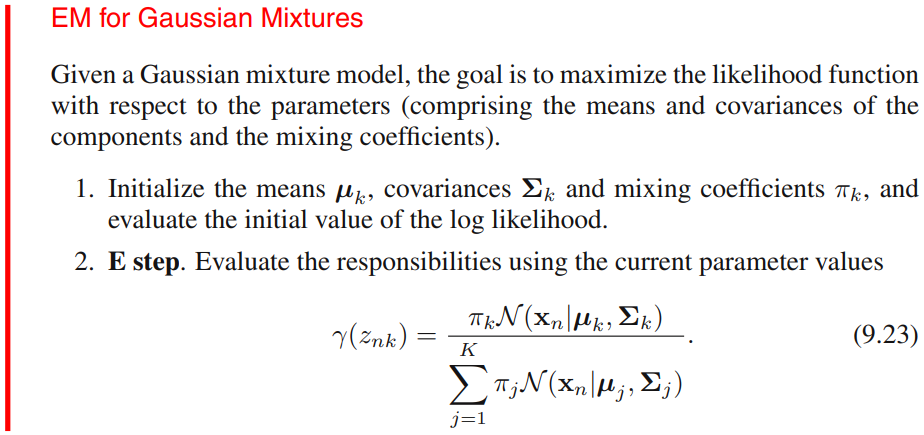

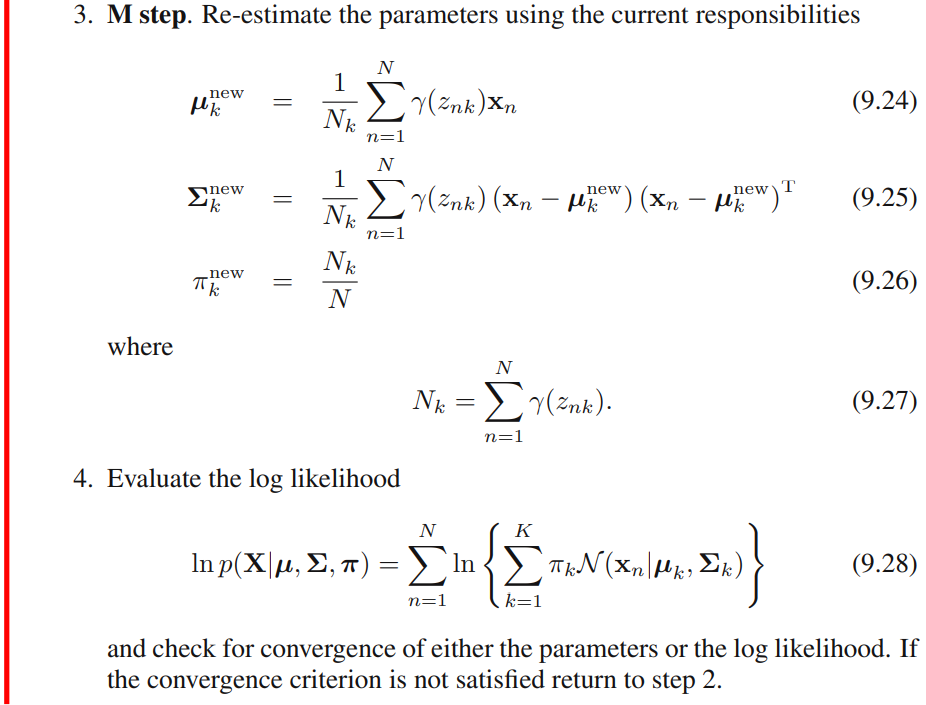

[[2.2888417  8.2725516 ]
 [8.07267085 0.89608509]
 [0.32571544 6.44637686]]
[[[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]]
[0.3 0.3 0.4]
(300, 3)


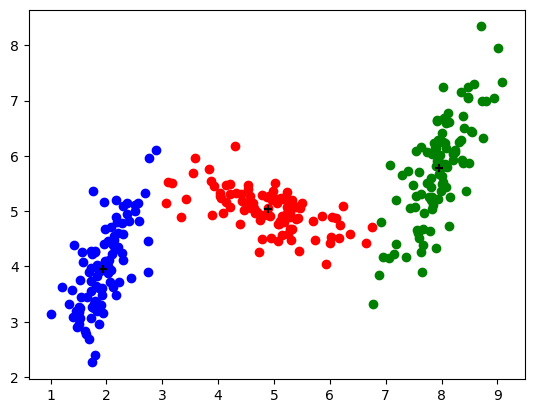

In [ ]:
mean = np.random.uniform(0, 10, (3, 2))

cov = np.zeros((3, 2, 2))
cov[:, :, :] = np.eye(2)

pi = np.array([ 0.3, 0.3, 0.4 ])

z = np.zeros((train_size, 3))

iters = 20
for iter in range(0, iters):

  # E Step
  gamma = np.zeros_like(z)
  for n in range(0, train_size):
    prob0 = multivariate_normal.pdf(x_train[n], mean[0], cov[0])
    prob1 = multivariate_normal.pdf(x_train[n], mean[1], cov[1])
    prob2 = multivariate_normal.pdf(x_train[n], mean[2], cov[2])
    prob = np.array([prob0, prob1, prob2])

    gamma[n] = pi * prob / np.sum(pi * prob)


  # M Step
  N = gamma.sum(axis=0)
  mean = 1 / N[:, np.newaxis] * (gamma.T @ x_train)

  for k in range(0, 3):
    s = np.zeros((2, 2))
    for i in range(0, train_size):
      difference = (x_train[i] - mean[k])[:, np.newaxis]
      squared_difference = difference @ difference.T
      s += gamma[i][k] * squared_difference
    cov[k] = s
  cov /= N[:, np.newaxis, np.newaxis]



colors = ['r', 'g', 'b']
for i in range(train_size):
  plt.scatter(x_train[i][0], x_train[i][1], c=colors[np.argmax(gamma[i])])
plt.scatter(mean[:, 0], mean[:, 1], marker="+", c="black")

In [ ]:
print(x_train.shape)
print(mean.shape)
print((x_train[:, np.newaxis, :] - mean[np.newaxis, :, :]).shape)
difference = x_train[:, np.newaxis, :] - mean[np.newaxis, :, :]
print(x_train[0])
print(mean)
print(difference[0])

(300, 2)
(3, 2)
(300, 3, 2)
[2.35767882 4.07482948]
[[ 2.35357691  4.51188267]
 [10.49717123  8.71794329]
 [ 2.12459825  1.84031062]]
[[ 4.10191545e-03 -4.37053187e-01]
 [-8.13949241e+00 -4.64311381e+00]
 [ 2.33080571e-01  2.23451886e+00]]
